In [1]:
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout


from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold


from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array

ROOT.gStyle.SetPalette(ROOT.kViridis);


import numpy as np


Welcome to JupyROOT 6.10/08


/home/dhruv/alice/sw/ubuntu1604_x86-64/ROOT/v6-10-08-1/lib/ROOT.py:432: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


### Get Data and MC files

In [5]:
#MCfile_name = '/home/dhruv/17l4_16_9bins_1GeV20GeV_200Mevents_lowptEta.root'#general purpose MC
#MCfile_name = '/home/dhruv/18g7a_16_9bins_1GeV20GeV_1Mevents_hitsITS.root'#pp dijet
#MCfile_name = '/home/dhruv/17l3_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
MCfile_name = '/home/dhruv/17l3b_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name = '/home/dhruv/16k5a_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name = '/home/dhruv/17l3b_16_10bins_halfGeV20GeV_1Mevents.root'
#MCfile_name = '/home/dhruv/17l3b_16_9bins_1GeV30GeV_1Mevents_noFakes.root'




#Datafile_name = '/home/dhruv/fout_16_17p_new_halfGeV20GeV_tracking.root'
#Datafile_name = '/home/dhruv/fout_16_17p_new_ppTracking.root'
Datafile_name = '/home/dhruv/fout_16_17p_new_1GeV20GeV_tracking_addedPileUp.root'


MCfile = ROOT.TFile(MCfile_name)
Datafile = ROOT.TFile(Datafile_name)

filedata = ROOT.TFile('/home/dhruv/HEPData_20GeV.root','READ')
published_data = filedata.Get('hTrack_HEP')

### Get response Matrix and plot it, also true/reco ratio

<ROOT.TH2F object ("hCorrelation_cor") at 0x76b0a10>
<ROOT.TH1D object ("hCorrelation_cor_px") at 0x51d8650>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


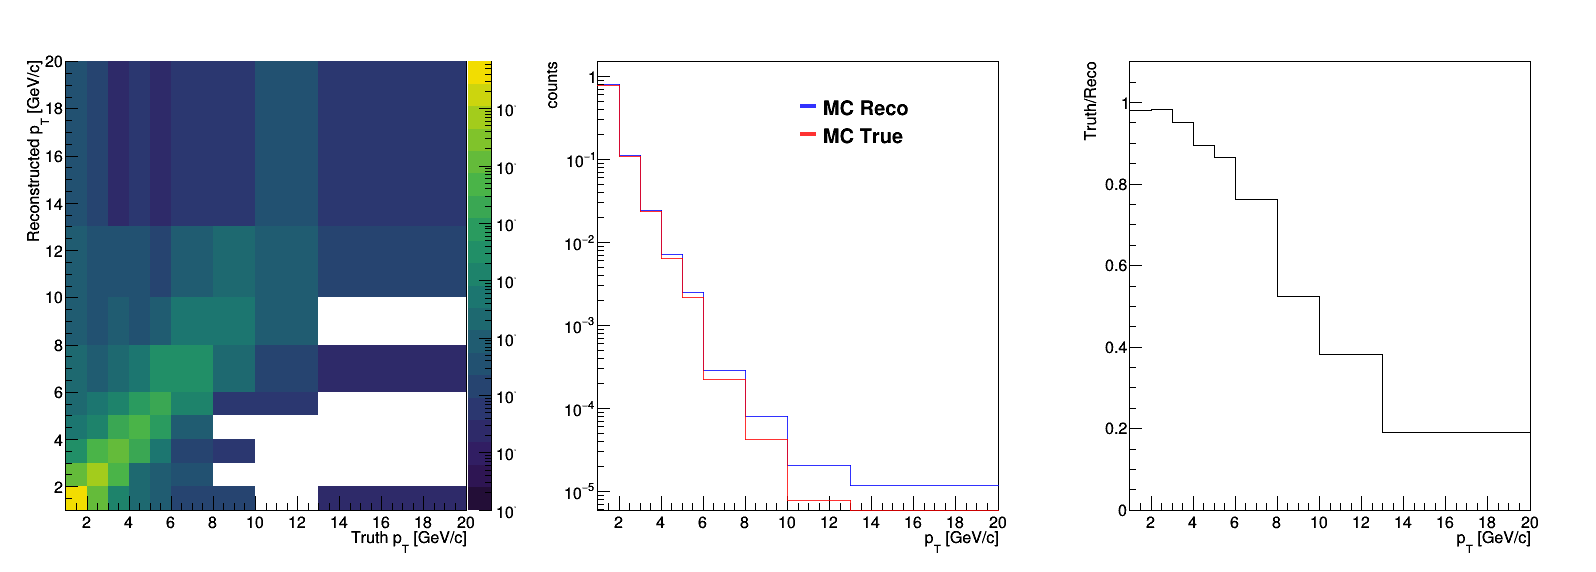

In [9]:
responseMatrix = MCfile.Get("hCorrelation_cor");
print responseMatrix
#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
responseMatrix.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')
#responseMatrix.SetMinimum(1e-7)
        
#print responseMatrix.GetBinError(5,6)
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()

print mc_truth

for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
    binCon_truth_error = mc_truth.GetBinError(i)
    binCon_reco_error = mc_reco.GetBinError(i)
    mc_truth.SetBinError(i, binCon_truth_error/binWidth)
    mc_reco.SetBinError(i, binCon_reco_error/binWidth)
    #print binCon_truth_error
#mc_truth.Sumw2()
#mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.SetMinimum(1e-8)
responseMatrix.GetXaxis().SetRangeUser(1,20)
responseMatrix.GetYaxis().SetRangeUser(1,20)
responseMatrix.Draw('colz')
ROOT.gPad.SetLogz()

c.cd(2)
label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')
mc_reco.GetXaxis().SetRangeUser(1,20)
mc_truth.GetXaxis().SetRangeUser(1,20)
#hs_mc = ROOT.THStack()
#hs_mc.Add(mc_reco)
#hs_mc.Add(mc_truth)
#hs_mc.Draw('nostacke')
mc_reco.SetTitle('; p_{T} [GeV/c]; counts')
mc_reco.Draw('histe')
mc_truth.SetTitle('; p_{T} [GeV/c]; counts')
mc_truth.Draw('histesame')
label.Draw(0.5,.87)
ROOT.gPad.SetLogy()

c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetMinimum(0.0)
ratio_mc.SetMaximum(1.1)
ratio_mc.SetLineColor(1)
ratio_mc.SetMarkerStyle(5)
ratio_mc.GetXaxis().SetRangeUser(1,20)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('histe')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Update()
c.Draw()

#c.SaveAs('Matrix_tracking_its_pp_17l3b_wNeutrals.png')
#c.SaveAs('reWeighted_response_pp.png')

# Data Spectrum

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


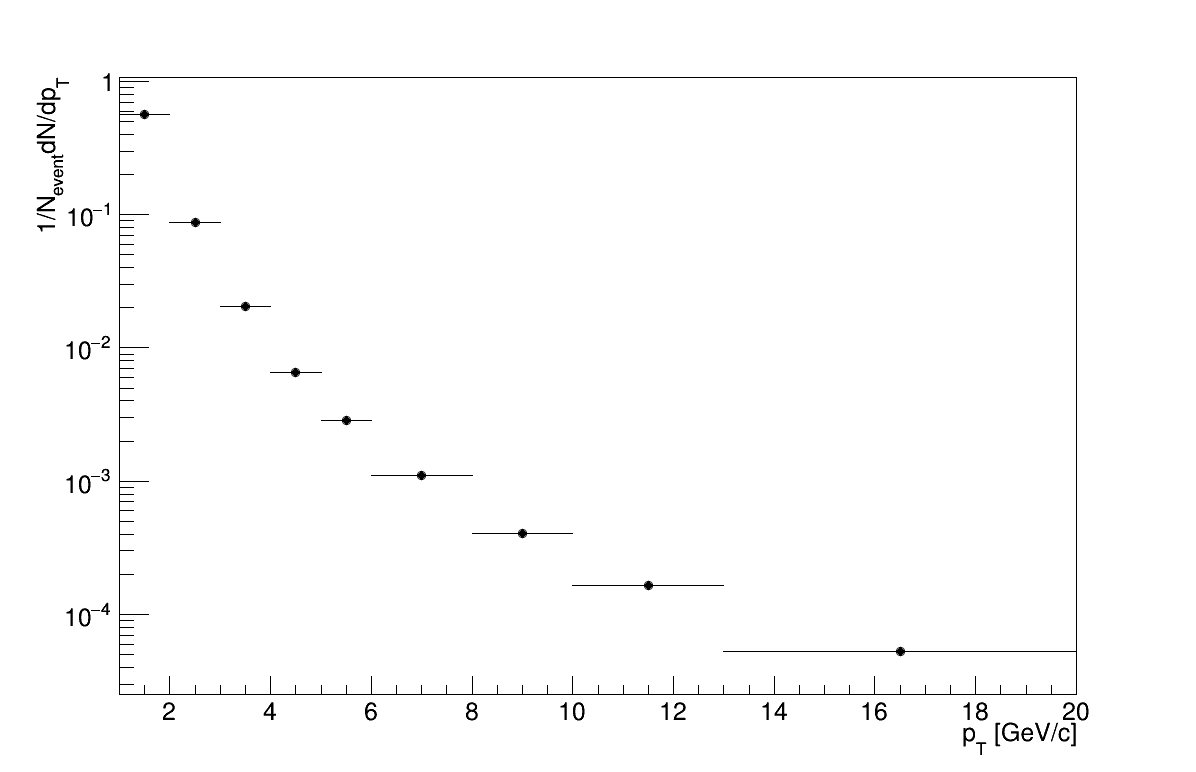

In [4]:
data = Datafile.Get('hReco').Clone()
data.ClearUnderflowAndOverflow()
data.SetLineColor(ROOT.kBlack)
data.SetMarkerColor(ROOT.kBlack)
data.SetMarkerStyle(20)
data.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
numEvents = 659038#747090.0 #pp events
max_eta = 1.6
#data.Scale(1/(numEvents*max_eta))
c = ROOT.TCanvas('c','c',1200,800)
data.Draw('e')
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_pp.png')

### Get and plot efficiency and fake rate


****************************************
Minimizer is Linear
Chi2                      =      9.42084
NDf                       =            8
p0                        =     0.852871   +/-   0.00139014  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file EfficiencyAndFakeRate_tracking_pp_wFakeRemoval.png has been created
Info in <TCanvas::Print>: pdf file EfficiencyAndFakeRate_tracking_pp_wFakeRemoval.pdf has been created


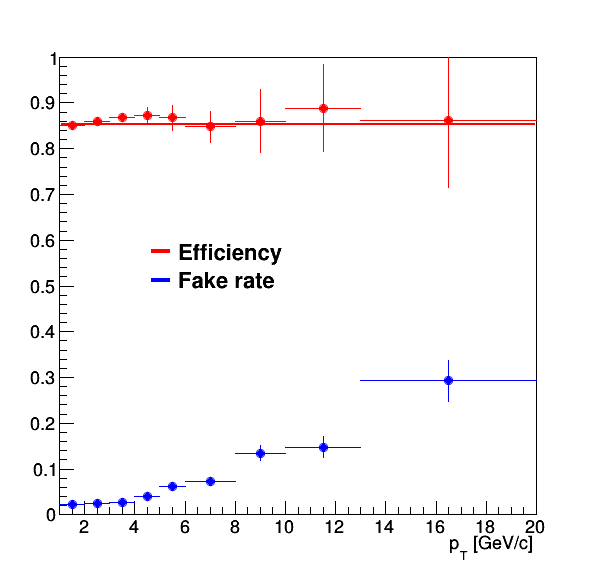

In [6]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV/c];')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(1,20)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 1,20)
efficiency.Draw()
fakerate.Draw('same')

#label = Legend("MC: 13b2_efix_p1")
label = Legend("")
label.Add(efficiency,'Efficiency','L')
label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.61)
c.Draw()
c.SaveAs('EfficiencyAndFakeRate_tracking_pp_wFakeRemoval.png')
c.SaveAs('EfficiencyAndFakeRate_tracking_pp_wFakeRemoval.pdf')


#for i in range(efficiency.GetNbinsX()):
#    low = efficiency.GetBinLowEdge(i)
#    center =   efficiency.GetBinCenter(i)
#    high = efficiency.GetBinLowEdge(i+1)
#    content =  efficiency.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content
    
#for i in range(fakerate.GetNbinsX()+1):
#    low = fakerate.GetBinLowEdge(i)
#    center =   fakerate.GetBinCenter(i)
#    high = fakerate.GetBinLowEdge(i+1)
#    content =  fakerate.GetBinContent(i)
#    print low, '\t', center, '\t', high, '\t',content

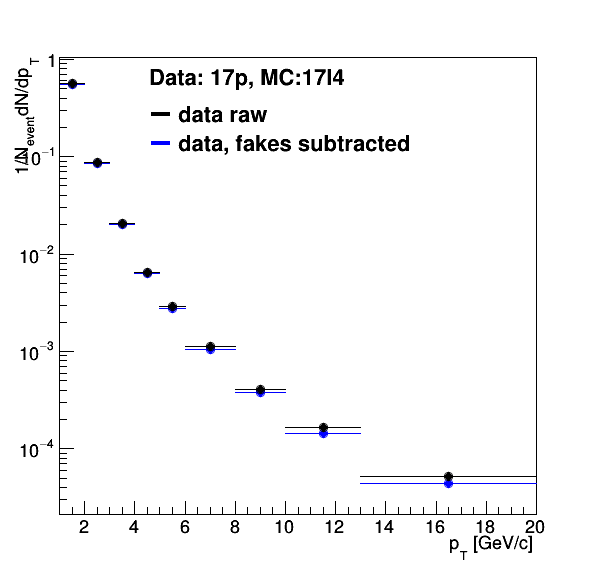

In [6]:
data_bkgsub = data.Clone()
for i in range(1,fakerate.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c.Clear()
data.GetXaxis().SetRangeUser(1,20)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('e')
data.Draw('esame')

ROOT.gPad.SetLogy()
label = Legend("Data: 17p, MC:17l4")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, fakes subtracted','L')
label.Draw(.25,.85)
c.Draw()
#c.SaveAs('FakeRate_sub_tracking_its_1GeV20GeV.png')


### DEFINE DATA FOR UNFOLDING 

In [7]:
data_inputforunfolding = data_bkgsub.Clone()
#data_inputforunfolding = data.Clone()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


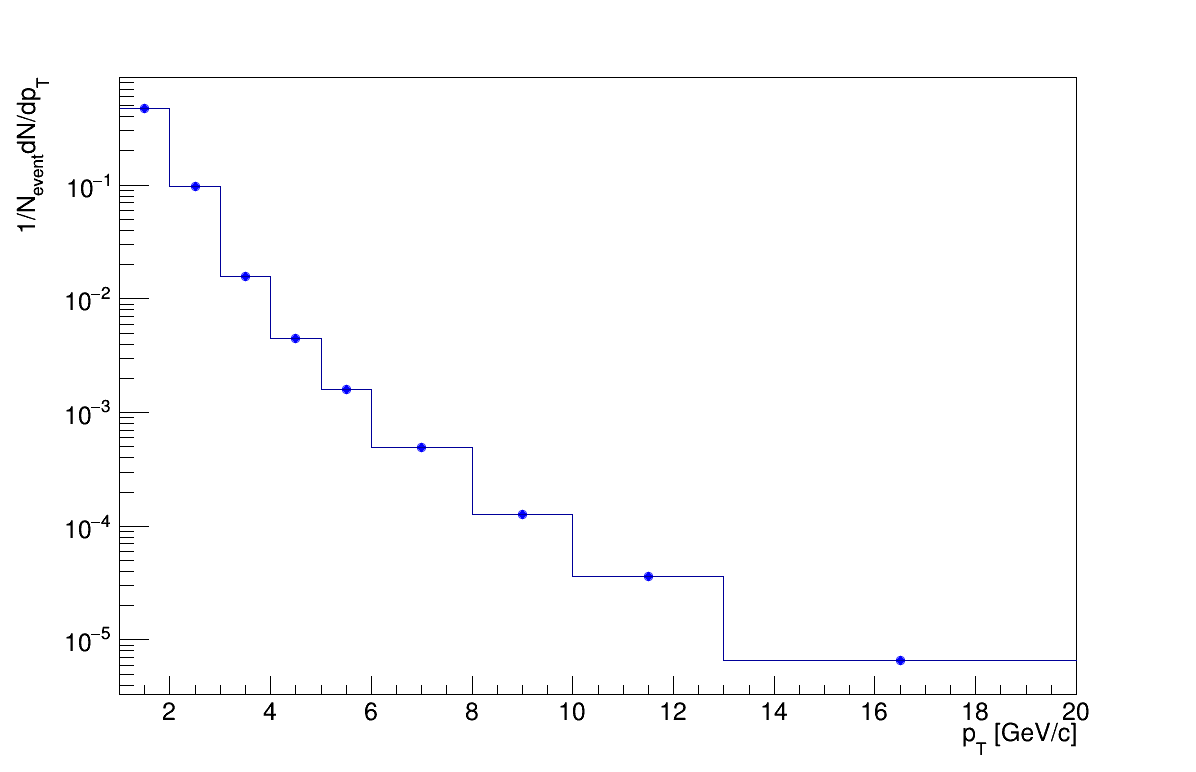

In [8]:
#pp
nbinstrack = 9
track_bins = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content = np.array([4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
                              4.90E-04, 1.27E-04, 3.64E-05, 6.66E-06], dtype='float64')
published_error = np.array([1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
                            1.20E-06, 6.04E-07, 2.63E-07, 7.34E-08], dtype='float64')

#nbinstrack = 10
#track_bins = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
#published_content = np.array([1.11E+00, 4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
#                              9.80E-04, 2.53E-04, 1.09E-04, 4.66E-05], dtype='float64')
#published_error = np.array([2.69E-04, 1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
#                            2.39E-06, 1.21E-06, 7.89E-07, 5.13E-07], dtype='float64')


h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

h.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
h.SetMarkerStyle(20)
h.SetMarkerColor(ROOT.kBlue)


c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


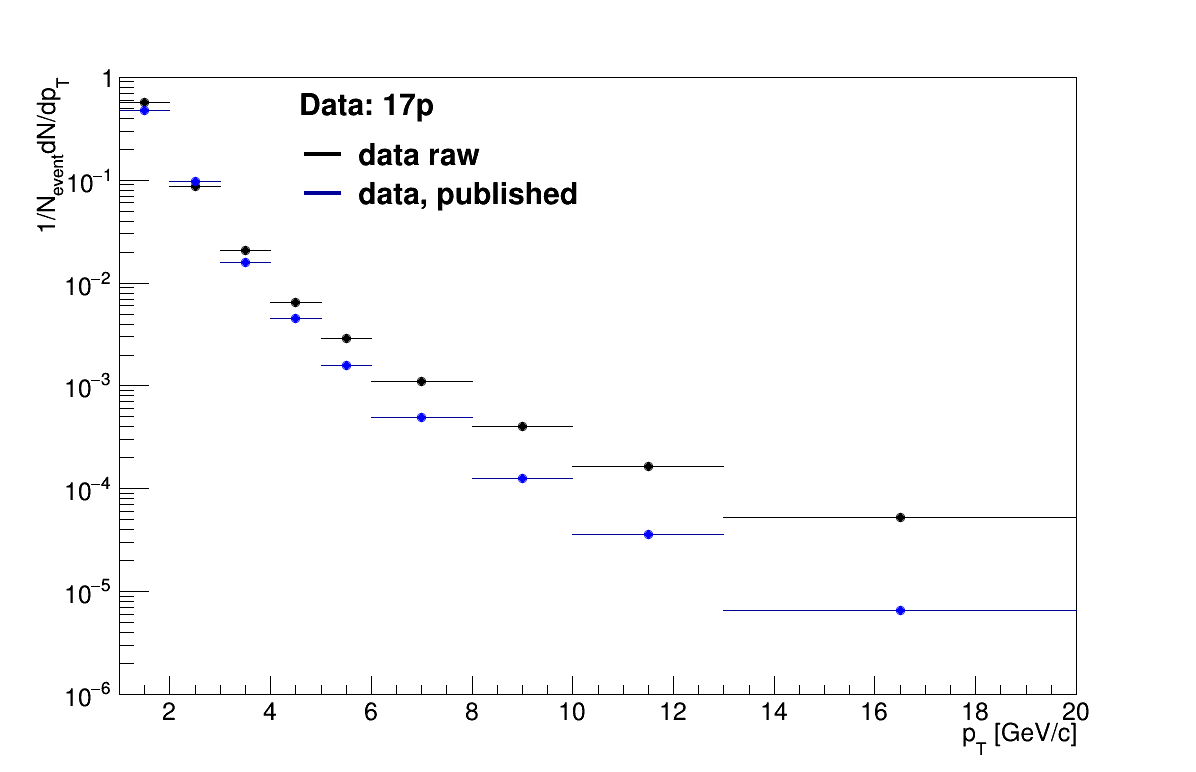

In [9]:
data.GetYaxis().SetRangeUser(1e-6,1)
c= ROOT.TCanvas('c','c',1200,800)
data.Draw('e')
h.Draw('esame')

label = Legend("Data: 17p")
label.Add(data,'data raw','L')
label.Add(h,'data, published','L')
label.Draw(.25,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('data_spectra.png')

# Raw to published

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_rawPublished.png has been created


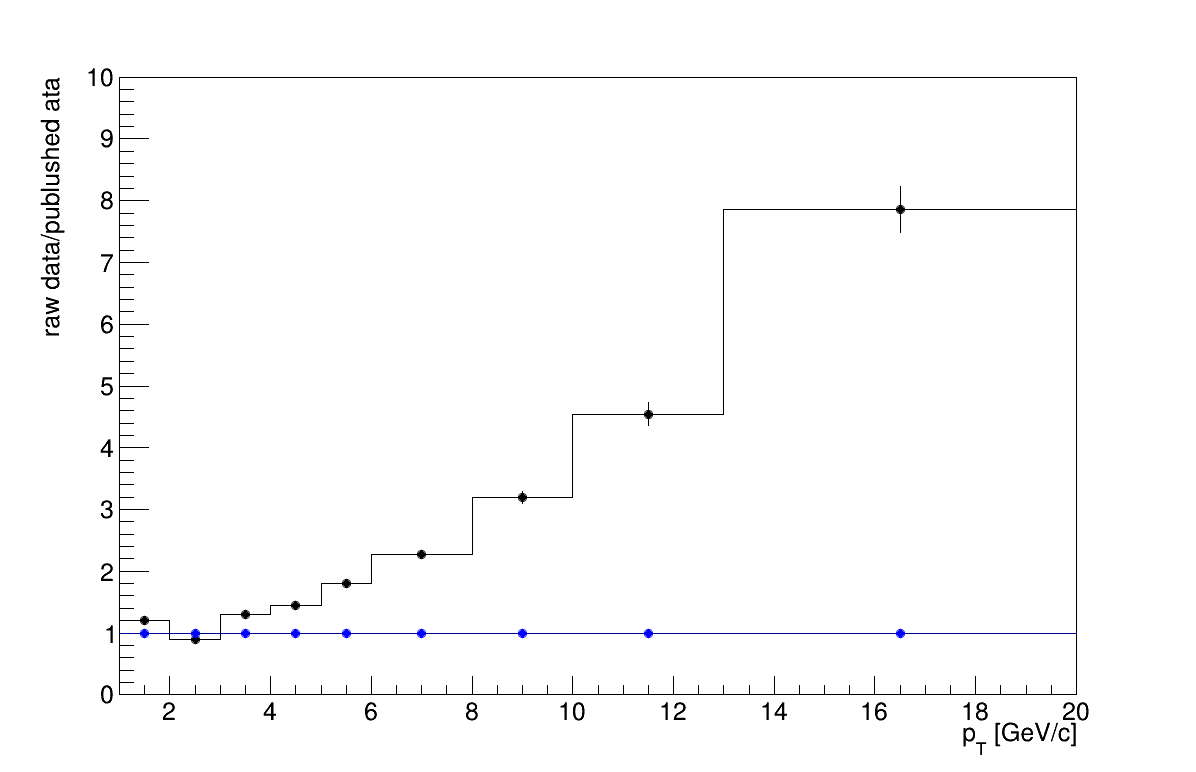

In [10]:
ratio_one = h.Clone()
ratio_one.Divide(h)
ratio_rawPublished = data.Clone()
ratio_rawPublished.Divide(h)

ratio_rawPublished.GetYaxis().SetRangeUser(0,10)

ratio_rawPublished.SetTitle(';p_{T} [GeV/c];raw data/publushed ata')
c= ROOT.TCanvas('c','c',1200,800)
ratio_rawPublished.Draw('histe')
ratio_one.Draw('same')
c.Draw()
c.SaveAs('ratio_rawPublished.png')

# Refolding

In [27]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        #efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        eff = efficiency.GetBinContent(i)
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected

for i in range(responseMatrix.GetNbinsX()):
    ySliceSum = float(0.0)
    for j in range(responseMatrix.GetNbinsY()):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        ySliceSum = ySliceSum + tempCont
    #print "ySliceSum = ", ySliceSum, "bin: ", i+1
    for j in range (responseMatrix.GetNbinsY()+1):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        newCont = tempCont/ySliceSum
        responseMatrix.SetBinContent(i+1, j+1, newCont)
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()#data_unfolded['SVD8'].GetNbinsX()


data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

#ratio_mc.Scale(1/ratio_mc.Integral())
#h_wEff.Scale(1/h_wEff.Integral())

for ireco in range(1,N+1):
    temp = 0
    for itruth in range(1,N+1):
        #print responseMatrix.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)

old_int = h_wEff.Integral()
#datarefolded.Divide(ratio_mc)

#for i in range(ratio_mc.GetNbinsX()+1):
#    print h_wEff.GetBinContent(i+1), '\t', ratio_mc.GetBinContent(i+1), '\t', h_wEff.GetBinWidth(i+1)
#    refolded_temp = (h_wEff.GetBinContent(i+1)*ratio_mc.GetBinContent(i+1))
#    data_refolded.SetBinContent(i, refolded_temp)

#data_refolded.Scale(old_int/data_refolded.Integral())

#print h.Integral()
print h_wEff.Integral()
print data_refolded.Integral()


0.497589232767
0.497587487846


0.497589232767
0.497587487846


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file refolding_pp_its_ratioProduct_NormalizeMatrix.png has been created


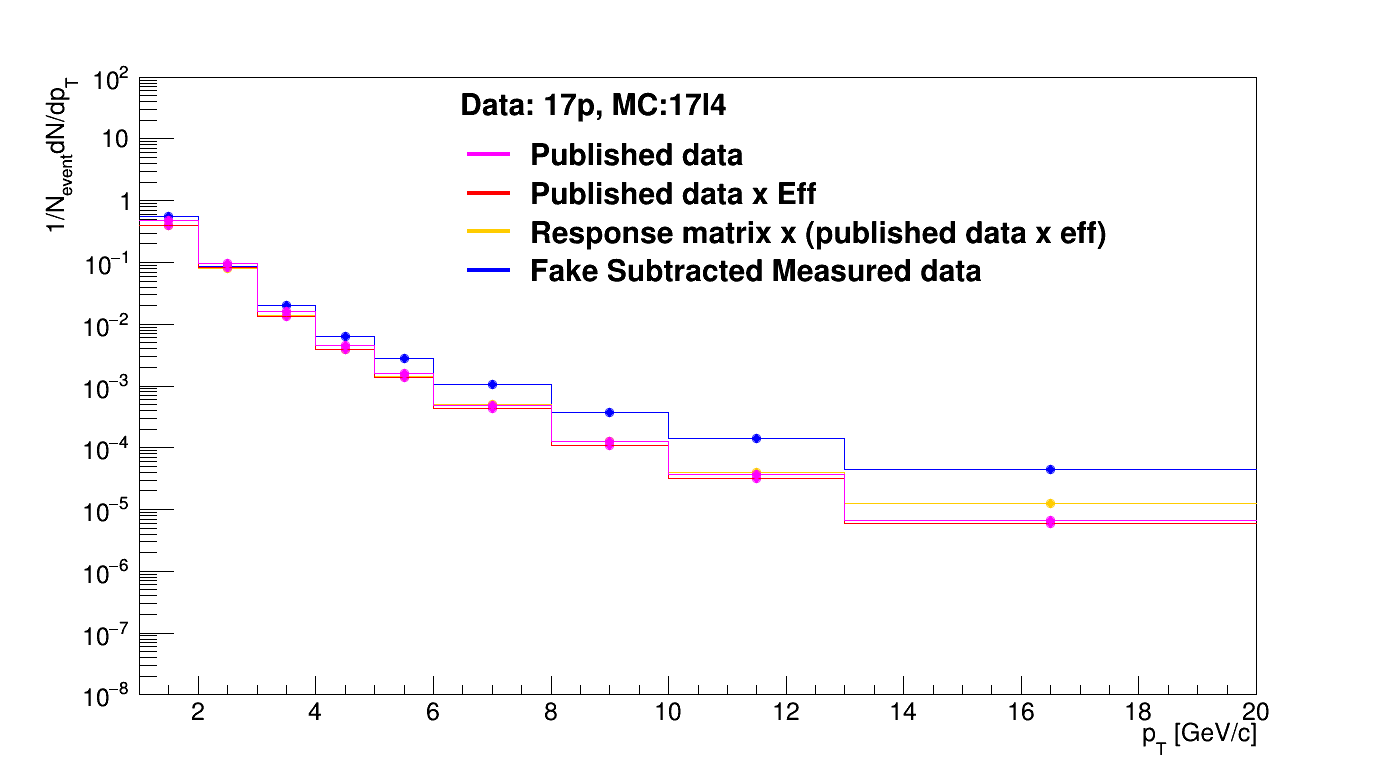

In [31]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',1400,800)
h.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetLineColor(ROOT.kBlue)
data_refolded.SetLineColor(ROOT.kOrange)
h.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kBlue)
data_refolded.SetMarkerColor(ROOT.kOrange)

data_refolded.GetXaxis().SetRangeUser(1,20)
data_refolded.SetTitle(";p_{T} [GeV/c];1/N_{event}dN/dp_{T}")
data_bkgsub.SetMaximum(1e2)
data_bkgsub.SetMinimum(1e-8)

data_bkgsub.Draw('histe')
data_refolded.Draw('histesame')
h_wEff.Draw('histesame')
h.Draw('histesame')



label = Legend("Data: 17p, MC:17l4")
label.Add(h,'Published data','L')
label.Add(h_wEff,'Published data x Eff','L')
label.Add(data_refolded,'Response matrix x (published data x eff)','L')
label.Add(data_bkgsub,'Fake Subtracted Measured data','L')
label.Draw(.33,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pp_its_1GeV20GeV.pdf')
c.SaveAs('refolding_pp_its_ratioProduct_NormalizeMatrix.png')

print h_wEff.Integral()
print data_refolded.Integral()

In [32]:
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_refolded = data_refolded.Clone()
ratio_h_wEff = h_wEff.Clone()
ratio_h = h.Clone()

ratio_data_bkgsub.Divide(ratio_h)
ratio_data_refolded.Divide(ratio_h)
ratio_h_wEff.Divide(ratio_h)
ratio_h.Divide(ratio_h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_pink__NormalizeMatrix.png has been created


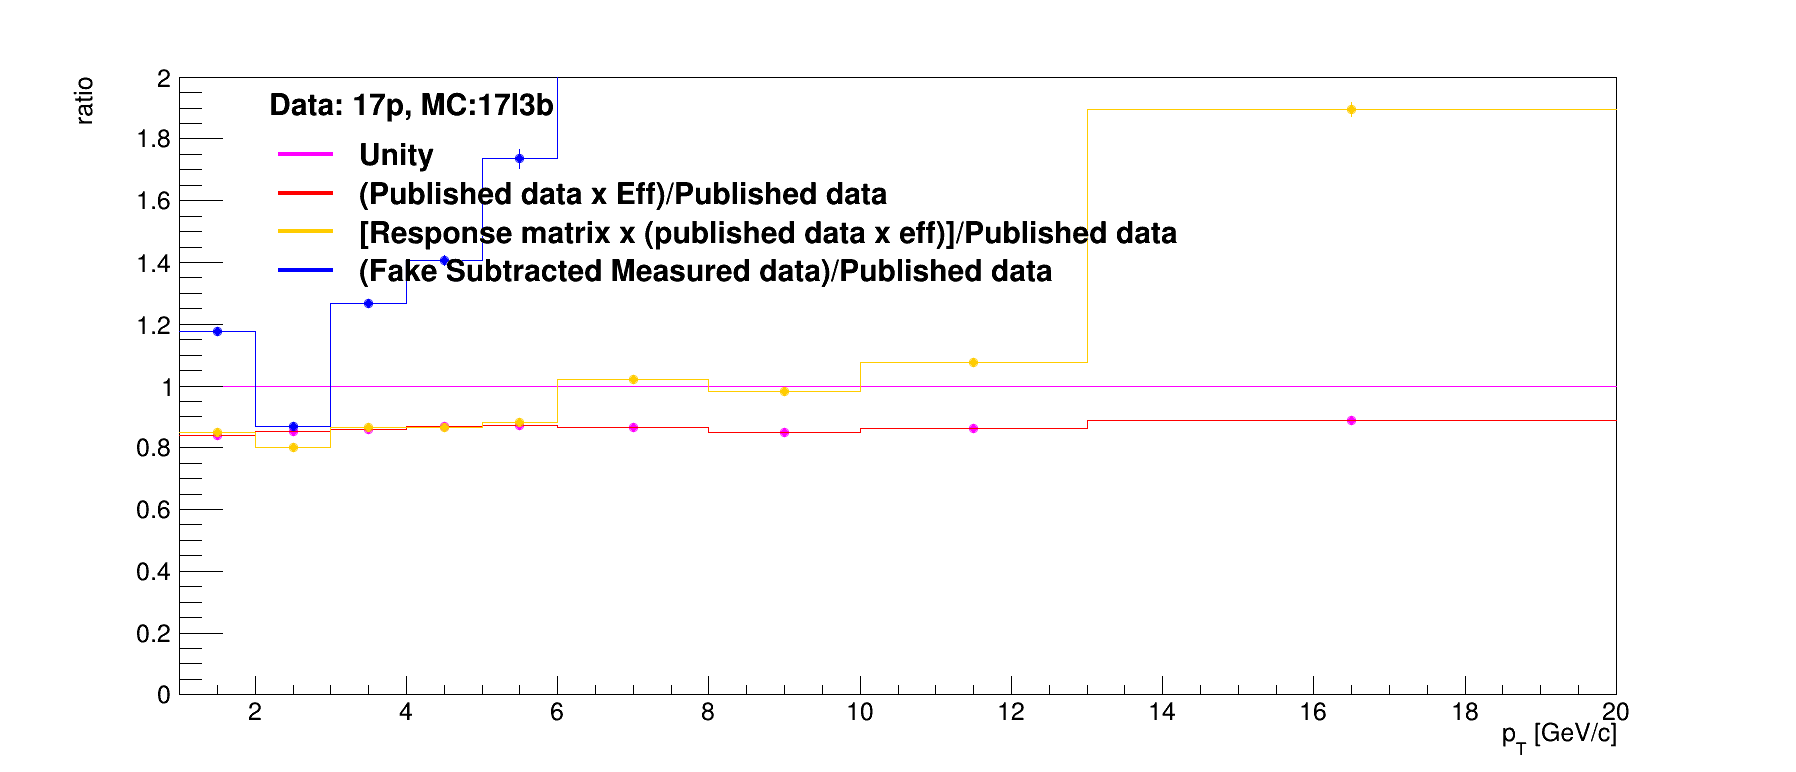

In [33]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_h.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_h.SetMaximum(2.0)
ratio_h.SetMinimum(0.0)
ratio_h.GetXaxis().SetRangeUser(1,20)


ratio_h.Draw('hist')
ratio_h_wEff.Draw('histesame')
ratio_data_refolded.Draw('histesame')
ratio_data_bkgsub.Draw('histesame')

label = Legend("Data: 17p, MC:17l3b")
label.Add(ratio_h,'Unity','L')
label.Add(ratio_h_wEff,'(Published data x Eff)/Published data','L')
label.Add(ratio_data_refolded,'[Response matrix x (published data x eff)]/Published data','L')
label.Add(ratio_data_bkgsub,'(Fake Subtracted Measured data)/Published data','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
c.SaveAs('ratio_pink__NormalizeMatrix.png')

In [15]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data_sub = data_bkgsub.Clone()
ratio_refold_data_sub.Divide(data_refolded)
#ratio_refold_data_sub.SetLineColor(ROOT.kBlue)
#ratio_refold_data_sub.SetMarkerColor(ROOT.kBlue)

ratio_refold_data = data.Clone()
ratio_refold_data.Divide(data_refolded)

print ratio_refold_pub.Integral()

603.861494243


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


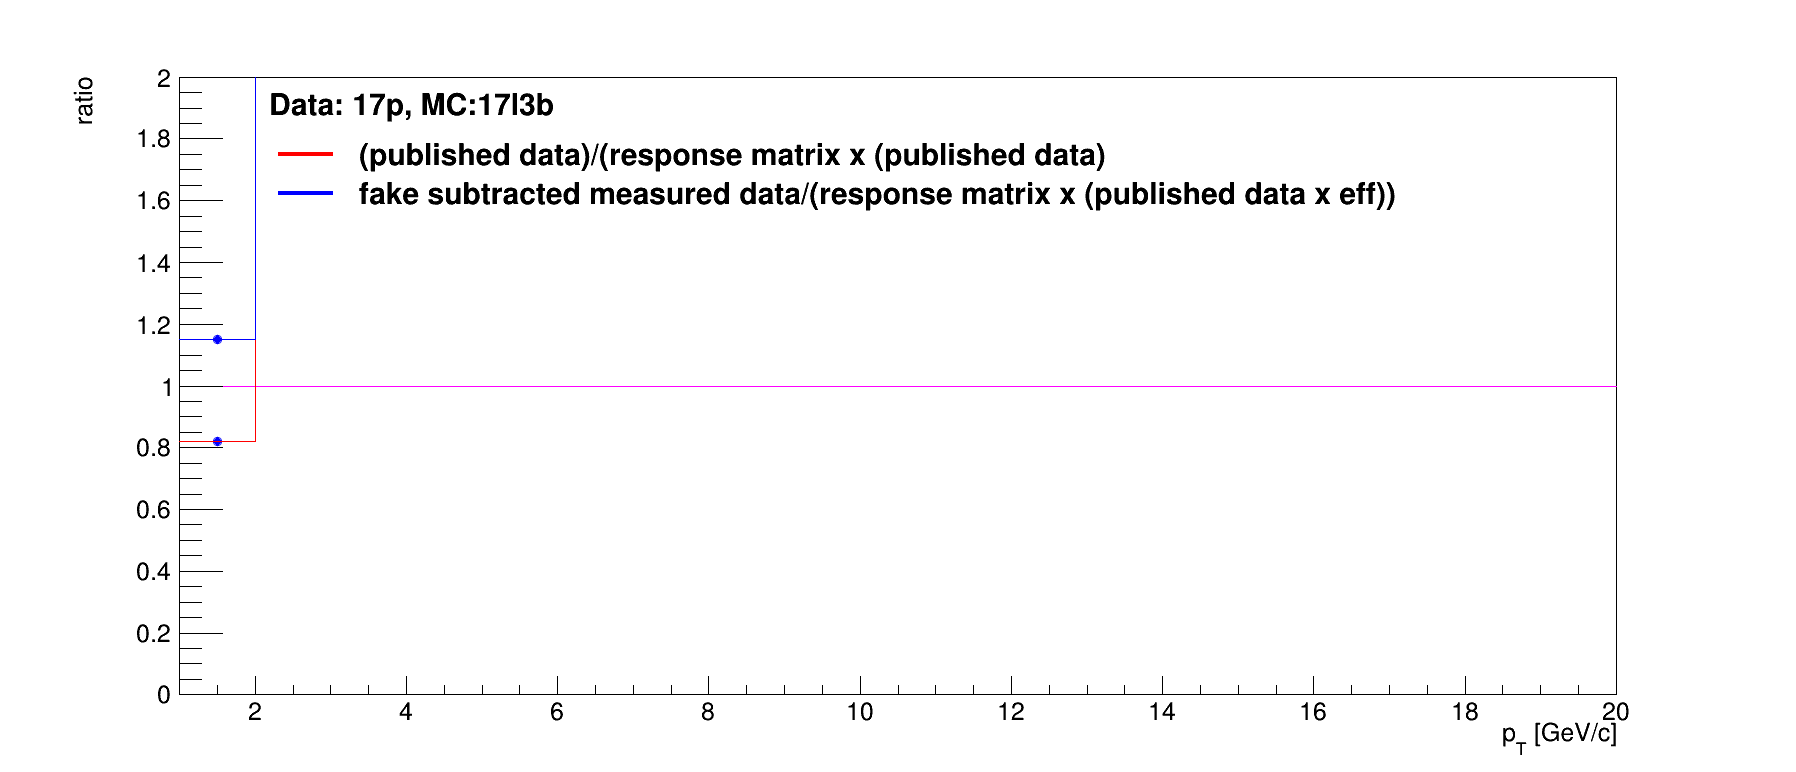

In [16]:
c= ROOT.TCanvas('c','c',1800,800)

ratio_unity = h.Clone()
ratio_unity.Divide(h)
ratio_unity.SetTitle('; p_{T} [GeV/c]; ratio')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_refold_unfoldedSVD.Draw('histsame')
#ratio_refold_data.Draw('histesame')
ratio_unity.GetXaxis().SetRangeUser(1,20)
ratio_unity.Draw('hist')
ratio_refold_pub.Draw('histesame')
ratio_refold_data_sub.Draw('histesame')

label = Legend("Data: 17p, MC:17l3b")
#label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'(published data)/(response matrix x (published data)','L')
label.Add(ratio_refold_data_sub,'fake subtracted measured data/(response matrix x (published data x eff))','L')
label.Draw(.15,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_1GeV20GeV_errors.pdf')
#c.SaveAs('ratio_refolding_pp_17l3b_wNeutrals_scaling.png')